In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Import the library
from matplotlib_venn import venn3
from matplotlib.pyplot import figure

import scipy.stats as stats

In [19]:
X_train = pd.read_csv('X_train_prepared.csv')
y_train = pd.read_csv('y_train.csv')

In [20]:
train = X_train.merge(y_train,on=X_train.index).drop('key_0',axis=1)

In [31]:
categorical_columns = list(X_train.select_dtypes('object').columns)
categorical_columns.extend(['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'])
print("Categorical Features: ",categorical_columns)
print()
numerical_columns = list(X_train.select_dtypes(exclude=['object']).columns)
numerical_columns = [i for i in numerical_columns if i not in ('Dependent_count','Attrition_Flag','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon')]
print("Numerical Features: ", numerical_columns)
print()
print('Target Variable: Attrition_Flag')

# includes attrition
numerical_columns_attrition = list(X_train.select_dtypes(exclude=['object']).columns)
numerical_columns_attrition = [i for i in numerical_columns if i not in ('Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon')]

Categorical Features:  ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'missing_marital_status', 'missing_education_level', 'missing_income_category']

Numerical Features:  ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'missing_marital_status', 'missing_education_level', 'missing_income_category']

Target Variable: Attrition_Flag


In [32]:
missing_ms = []
alpha = .05
zero = X_train[X_train['missing_marital_status']==0]
one = X_train[X_train['missing_marital_status']==1]

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(X_train['missing_marital_status'], X_train[pair]))[1]
    if p_val < alpha:
        missing_ms.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with missing_marital_status according to Chi-Squared Test: ', missing_ms)
missing_ic = []
alpha = .05

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(X_train['missing_income_category'], X_train[pair]))[1]
    if p_val < alpha:
        missing_ic.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with missing_income_category according to Chi-Squared Test: ', missing_ic)

missing_el = []
alpha = .05

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(X_train['missing_education_level'], X_train[pair]))[1]
    if p_val < alpha:
        missing_el.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with missing_education_level according to Chi-Squared Test: ', missing_el)

Categorical Variables associated with missing_marital_status according to Chi-Squared Test:  ['Card_Category', 'Dependent_count', 'Total_Relationship_Count', 'Contacts_Count_12_mon', 'missing_marital_status']
Categorical Variables associated with missing_income_category according to Chi-Squared Test:  ['Gender', 'Education_Level', 'Months_Inactive_12_mon', 'missing_education_level', 'missing_income_category']
Categorical Variables associated with missing_education_level according to Chi-Squared Test:  ['missing_education_level', 'missing_income_category']


In [23]:
# Observations



In [24]:
# 2.2 Univariate Analysis (Descriptive)

In [26]:
not_churned = train[train['Attrition_Flag'] == 0]
churned = train[train['Attrition_Flag'] == 1]
display(not_churned.describe())
churned.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,missing_marital_status,missing_education_level,missing_income_category,Attrition_Flag
count,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.0
mean,46.322719,2.340410,35.928793,3.916556,2.274215,2.355890,8801.834867,1257.418841,7544.416025,0.772034,4642.498157,68.593543,0.743351,0.293168,0.070618,0.149344,0.108949,0.0
std,8.049231,1.300307,7.993755,1.528881,1.020576,1.087372,9096.845789,760.994332,9095.598358,0.218234,3513.432128,22.886841,0.229982,0.271770,0.256204,0.356453,0.311598,0.0
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000,0.000000,0.000000,0.000000,0.0
25%,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2636.000000,797.500000,1222.500000,0.642500,2347.500000,54.000000,0.615000,0.054000,0.000000,0.000000,0.000000,0.0
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4752.000000,1372.000000,3572.000000,0.742000,4093.000000,71.000000,0.722000,0.207000,0.000000,0.000000,0.000000,0.0
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11453.500000,1812.000000,10178.000000,0.860000,4775.000000,82.000000,0.833000,0.522000,0.000000,0.000000,0.000000,0.0
max,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,138.000000,3.714000,0.994000,1.000000,1.000000,1.000000,0.0


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,missing_marital_status,missing_education_level,missing_income_category,Attrition_Flag
count,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.0
mean,46.622155,2.401366,36.089530,3.270865,2.697269,2.968892,8150.763050,669.787557,7480.975493,0.695397,3050.029590,44.811836,0.554547,0.161480,0.079666,0.163126,0.117602,1.0
std,7.682175,1.262952,7.839866,1.581091,0.920619,1.102122,9149.096857,926.570113,9166.086507,0.213773,2267.949334,14.589845,0.229715,0.264602,0.270878,0.369621,0.322259,0.0
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,10.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2111.750000,0.000000,1600.250000,0.545500,1900.500000,37.000000,0.400000,0.000000,0.000000,0.000000,0.000000,1.0
50%,46.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4159.500000,0.000000,3468.500000,0.701500,2312.500000,43.000000,0.529000,0.000000,0.000000,0.000000,0.000000,1.0
75%,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9915.750000,1330.000000,9373.500000,0.855750,2737.500000,51.000000,0.691500,0.227750,0.000000,0.000000,0.000000,1.0
max,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.411000,10583.000000,94.000000,2.500000,0.995000,1.000000,1.000000,1.000000,1.0


In [27]:
## 2.2.1 Categorical Data

In [28]:
missing_columns = ['missing_marital_status','missing_education_level','missing_income_category']
categorical_columns.extend(missing_columns)
categorical_columns

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

### Frequency Count

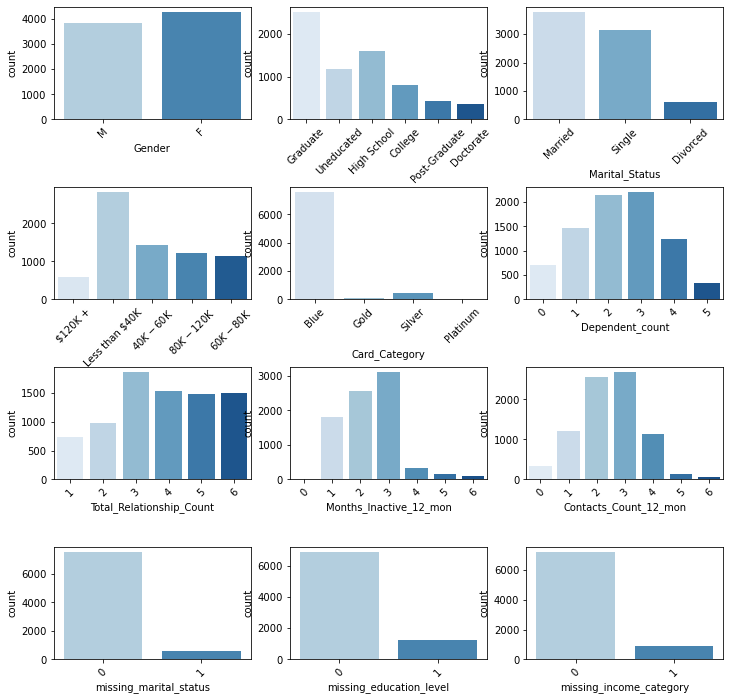

In [33]:
fig, ax = plt.subplots(4,3,figsize=(12,12))
ax = ax.ravel()
count=0
for cat in categorical_columns:
    ar = sns.countplot(x=cat, data=X_train,ax=ax[count], palette='Blues')
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    count+=1 

### Frequency Count by Attrition

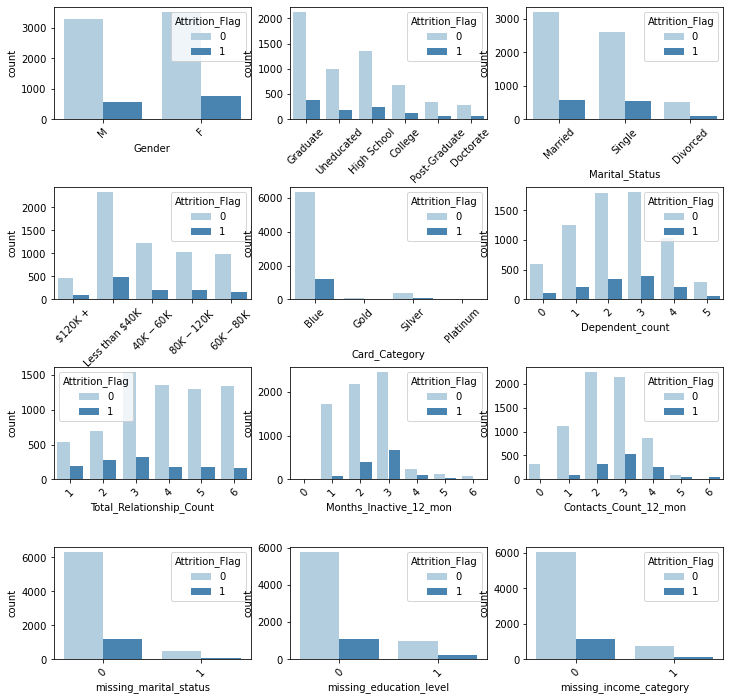

In [35]:
fig, ax = plt.subplots(4,3,figsize=(12,12))
ax = ax.ravel()
count=0
for cat in categorical_columns:
    ar = sns.countplot(x=cat, data=train,ax=ax[count], palette='Blues',hue='Attrition_Flag')
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.6)
    count+=1 

### Frequency Percentage by Attrition

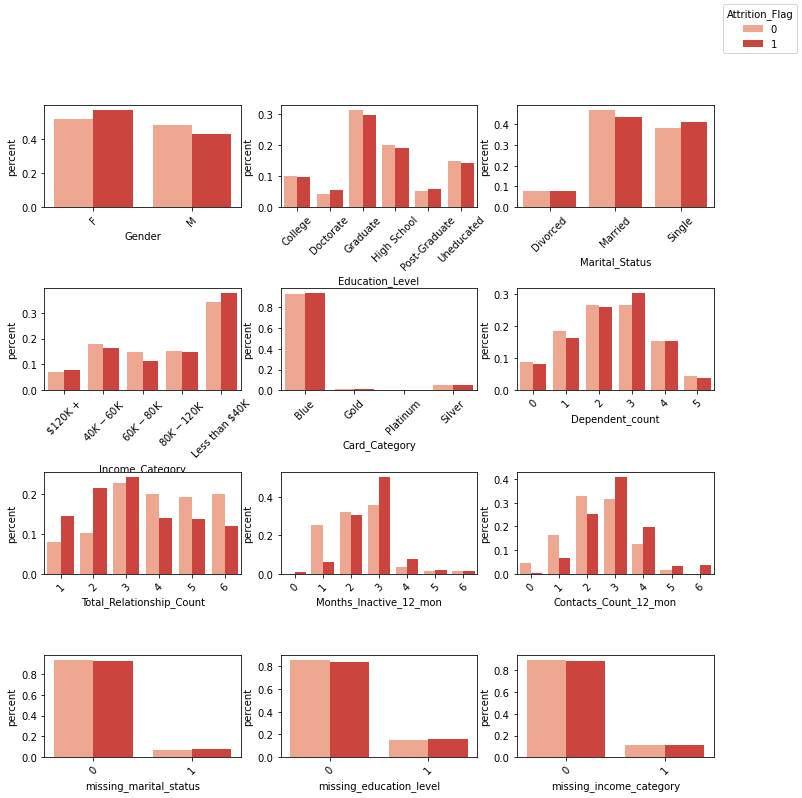

In [36]:
fig, ax = plt.subplots(4,3,figsize=(12,12))
ax = ax.ravel()
count = 0
for cat in categorical_columns:
    category_grouped = (train.groupby(['Attrition_Flag',cat]).size() / train.groupby(['Attrition_Flag']).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.barplot(x=cat, hue='Attrition_Flag', y='percent', data=category_grouped,ax=ax[count], palette='Reds',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.8)
    ar.legend_.remove()
    count+=1 
handles, labels = ax[count-1].get_legend_handles_labels()
fig.legend(handles, labels,title='Attrition_Flag')

### Categorical Data Observations

** `Gender` : For both genders, the probability of churning is less than the probability of not churning. But it looks like males are less likely to churn than females. This means that gender may be a good predictor of churn.

`Education_Level` : The distribution looks fairly similar for both attrited and non-attrited users. This means that education level may not be a good predictor of churn.

`Marital_Status` : The distribution looks fairly similar for both attrited and non-attrited users. This means that marital status may not be a good predictor of churn.

`Income_Category` : The distribution looks fairly similar for both attrited and non-attrited users. This means that income category may not be a good predictor of churn.

`Card_Category` : The distribution looks fairly similar for both attrited and non-attrited users. This means that card category may not be a good predictor of churn.

`Dependent_Count` : The distribution looks fairly similar for both attrited and non-attrited users. This means that dependent count may not be a good predictor of churn.

** `Total_Relationship_Count` : The distribution for non-attrited users looks somewhat uniform out when the count is greater than 3 with count < 3 being the least probable. For attrited users, the probability of having a count 2 or 3 is the highest with the other categories being somewhat evenly less likely. This means that total relationship count may be a good predictor of churn.

** `Months_Inactive_12_mon` : A majority of non-attrited users were only inactive between 1 to 3 months in the last 12 months. The distribution for attrited customers peaked at 3 with 2 being the second highest and the other counts less probable. This means that months inactive may be a good predictor of churn.

** `Contacts_Count_12_mon` : The distribution of contacts_count_12_mon looks different for churned and non-churned users. This means Contact Count may be a good predictor of churn.

`Missing_Marital_Status`: The distribution looks fairly similar for both attrited and non-attrited users. This means that missing marital status may not be a good predictor of churn.

`Missing_Education_Level`: The distribution looks fairly similar for both attrited and non-attrited users. This means that missing education level may not be a good predictor of churn.

`Missing_Income_Category`: The distribution looks fairly similar for both attrited and non-attrited users. This means that missing income category may not be a good predictor of churn.
  

** Represents categorical columns that may be a good predictor of churn based off their histograms

In [ ]:
associated_categorical_hist = ['Gender','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

In [ ]:
## 2.2.2 Numerical Data

In [ ]:
numerical_columns

In [ ]:
## Distribution Plots

In [ ]:
fig, ax = plt.subplots(4,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    sns.distplot(a=X[num], ax=ax[count],kde=False)
    count+= 1
    sns.boxplot(x=num, data=X, ax=ax[count], palette='Blues')
    count+=1

In [ ]:
## Distribution Plots by Attrition

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count = 0
for n in numerical_columns:
    sns.boxplot(y=n, data=X, ax=ax[count], palette='Blues',x='Attrition_Flag')
    count+=1

    
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0
for num in numerical_columns:
    for a in [churned[num], not_churned[num]]:
        sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)
    count+=1
    
orange_patch = mpatches.Patch(color='orange', label='Attrition_Flag=0')
blue_patch = mpatches.Patch(color='blue', label='Attrition_Flag=1')
fig.legend(handles=[orange_patch,blue_patch])

In [ ]:
X[X['Attrition_Flag'] > X['Attrition_Flag'].quantile(.75)]

In [ ]:
correlated_numerical_with_attrition

In [ ]:
associated_numerical_hist = ['Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [ ]:
### Numerical Data Observations

`Customer_Age`: The distribution looks fairly similar for both attrited and non-attrited users. This means that education level may not be a good predictor of churn.

`Months_on_book`: The distribution looks fairly similar for both attrited and non-attrited users. This means that Months on book may not be a good predictor of churn. The distribution looks somewhat normal but there is a big spike at around 36 months for both customer types.

`Credit_Limit`: The distribution looks fairly similar for both attrited and non-attrited users. This means that credit limit may not be a good predictor of churn. Both distributions are highly right skewed, and there are some outliers towards the right tail that are prominent for both types of customers. A high percentage of both types also have a credit limit close to 0.

** `Total_Revolving_Bal`: There is a high percentage of customers who have a balance close to 0 which is probably due their credit limit being close to 0. For churned customers, the distribution seems like an inverse gaussian distribution with the majority being at the tails. This may be because they were planning to leave (balance close to 0) or they were just inactive (balance on the right tail). In the non-churned distribution, more customers are clustered around the mean. But, it looks as if there are still many on the left and right tails. Also, almost every user who has a total_revolving_bal less than ~500 and greater than 0 is attrited. This means that total revolving balance may be a good predictor of churn.

`Avg_Open_To_Buy`: The distribution looks fairly similar for both attrited and non-attrited users. This means that average open to buy may not be a good predictor of churn. Both distributions are skewed right meaning that most people have spent an amount close to their credit limit.

** `Total_Amt_Chng_Q4_Q1` : Both distributions are clustered where the vlaue is less than 1 but non-attrited users are somewhat right skewed. Almost everyone who had a value greater than 1 was not attrited meaning those who spent more during the fourth quarter compared to the first quarter did not churn. This means that total amount change may be a good predictor of churn.

** `Total_Trans_Amt` : It seems like there may be more than one mode (polymodal) for both distributions. Everyone who had an amount greater than approximately 11000 was non-attrited as well as those with a value about 3400- approximately 6000. This could indicate that our customers fall into some natural segmentation we can use. This means that total trans amount may be a good predictor of churn.

** `Total_Trans_Ct` : Although it would seem intutive that this count is reflective of the total_trans_amt, the distributions seem to be different. The mean and standard deviation for non-churned customers is higher than churned customers. This makes sense. Everyone who had a count > ~90 was not attrited. This means that total trans count may be a good predictor of churn.

** `Total_Ct_Chng_Q4_Q1` : Both distributions are heavily clustered under value < 1 and look somewhat normal. This means that a majority of customers, churned or not, made the almost the same amount of transactions in quarter 4 compared to quarter 1. This means that total count change may be a good predictor of churn.

** `Avg_Utilization_Ratio` : The majority of churned customers have a ratio of 0 almost everyone who doesn't have that value is an outlier. This means that a majority of users made verys small purchases in regards to their credit limit. Churned customers are more likely to spend close to 0 compared to non-churned customers. This means that average utilization ratio may be a good predictor of churn.

** Represents numerical columns that may be a good predictor of churn based off their histograms

In [ ]:
# 2.3 Bivariate Analysis (Correlation)

In [ ]:
## 2.3.1 Categorical vs. Categorical Data

In [ ]:
### Countplot

In [ ]:
for cat in categorical_columns:
    fig, ax = plt.subplots(2,6,figsize=(20,6))
    ax = ax.ravel()
    count = 0
    for cat1 in categorical_columns:
        if cat1 != cat:
            category_grouped = (X_train.groupby([cat,cat1]).size() / X_train.groupby([cat]).size()).reset_index().rename({0:'percent'}, axis=1)
            ar = sns.pointplot(x=cat1, hue=cat, y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
            plt.setp(ax[count].get_xticklabels(), rotation=45)
            plt.subplots_adjust(hspace = 0.8)
            ar.legend_.remove()
            count+=1 

    handles, labels = ax[count-1].get_legend_handles_labels()
    fig.legend(handles, labels,title=cat)
   


### Chi-Squared Test

We want to see if these observations are statistically significant. We will compute a chi-squared test to see whether there is an association between any pair of categorical variables. 

In [ ]:
associated_categorical_variables = []
alpha = .05
enumerated = list(itertools.combinations(categorical_columns, r=2))

for pair in enumerated:
    p_val = stats.chi2_contingency(pd.crosstab(X_train[pair[0]],X_train[pair[1]]))[1]
    if p_val < alpha:
        associated_categorical_variables.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with each other according to Chi-Squared Test: ')
associated_categorical_variables

### Chi-Squared Test and Countplot Observations
    
`Income_Category` vs. `Gender` : Every female claim they make less than \\$40K or \\$40K-\\$60K. In contrast, most males claim they make \\$80K-\\$120K, with \\$60K-\\$80K coming in second. Females tend to make less money than males.

`Gender` vs. `Card_Category`: Blue card holders are comprised of more females than male. But, for every other card category the reverse is true.

`Gender` vs. `Contacts_Count_12_mon`: Credit card users who were in contact with 5 people from the credit card company were majority female. Credit card users who were in contact with less than 5 or greater than 5 people from the credit company were majority male.

`Marital_Status` vs. `Card_Category`: People in the blue category are more likely to be married than people in the other categories. People in the blue category are less likely to be single than people in the other categories.

`Marital_Status` vs. `Dependent_count`: People who have dependents are more likely to be married than single. People who have zero dependents are somewhat equally likely to be married or single.

`Card_Category` vs. `Income_Category` : The distribution of incomes for each card category looks vastly different. Blue card holders have more people who make less than \$40K compared to other card categories. People who have more income have a higher card level.

`Income_Category` vs. `Dependent_count`: People who make $120K+ are more likely to have two dependents than any other income level.

`Card_Category` vs. `Total_Relationship_Count` : Platinum members tend to buy only one to three products. The lower the card status, the more spread out the total relationship count distribution is from one to six products. This means there may be a relationship between card category and total relationship count.

`Dependent_count` vs. `Total_Relationship_Count`: People who have less dependents are more likely to purchase more products with the credit card company.

`Dependent_count` vs. `Contacts_Count_12_mon`: People who had more contact with the company are more likely to have more dependents.

`Total_Relationship_Count` vs. `Months_Inactive_12_mon` : The distribution of products owned by a customer is very different for customers who were inactive 0 months out of the last twelve months compared to the rest of customers. People who were active for all months of the past year had a different relationship count pattern than any other type of consumer.

In [ ]:
missing_ms = []
alpha = .05
zero = X_train[X_train['missing_marital_status']==0]
one = X_train[X_train['missing_marital_status']==1]

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(X_train['missing_marital_status'], X_train[pair]))[1]
    if p_val < alpha:
        missing_ms.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with missing_marital_status according to Chi-Squared Test: ', missing_ms)
missing_ic = []
alpha = .05

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(X_train['missing_income_category'], X_train[pair]))[1]
    if p_val < alpha:
        missing_ic.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with missing_income_category according to Chi-Squared Test: ', missing_ic)

missing_el = []
alpha = .05

for pair in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(X_train['missing_education_level'], X_train[pair]))[1]
    if p_val < alpha:
        missing_el.append(pair)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with missing_education_level according to Chi-Squared Test: ', missing_el)

In [ ]:
## 2.3.1 Target vs. Categorical Data

In [ ]:
count=0
fig, ax = plt.subplots(4,3,figsize=(20,6))
ax = ax.ravel()
for cat1 in categorical_columns:
    category_grouped = (X.groupby(['Attrition_Flag',cat1]).size() / X.groupby(['Attrition_Flag']).size()).reset_index().rename({0:'percent'}, axis=1)
    ar = sns.pointplot(x=cat1, hue='Attrition_Flag', y='percent', data=category_grouped,ax=ax[count], palette='Spectral',dodge=True)
    plt.setp(ax[count].get_xticklabels(), rotation=45)
    plt.subplots_adjust(hspace = 0.8)
    ar.legend_.remove()
    count+=1 
handles, labels = ax[count-1].get_legend_handles_labels()
fig.legend(handles, labels,title='Attrition_Flag')


In [ ]:
associated_categorical_variables_with_target = []
alpha = .05

for cat in categorical_columns:
    p_val = stats.chi2_contingency(pd.crosstab(X[cat],X['Attrition_Flag']))[1]
    if p_val < alpha:
        associated_categorical_variables_with_target.append(cat)
        #print('We REJECT the null hypothesis. There IS an association between', pair, 'with p-value of ',p_val)
    #else:
       # print('We ACCEPT the null hypothesis. There IS NOT an association between', pair, 'with p-value of ',p_val)
print('Categorical Variables associated with Attrition_Flag: ')
associated_categorical_variables_with_target

In [ ]:
### Chi-Squared Test and Countplot Results

`Gender`: People who attrite are more likely to be female than male.

`Income_Category`: People who attrite are less likely to be married.

`Total_Relationship_Count`: People who bought more products are less likely to attrite.

`Months_Inactive_12_mon`: As months inactive increases, so does the probability of attriting.

`Contacts_Count_12_mon`: Consumers who were in contact with more people in the credit card company are more likely to attrite.

In [ ]:
## 2.3.2 Numerical vs. Numerical

In [ ]:
### Scatterplots

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Customer_Age'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Months_on_book'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Credit_Limit'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Revolving_Bal'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [not_churned[col], churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Avg_Open_To_Buy'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Trans_Amt'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Trans_Ct'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Amt_Chng_Q4_Q1'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Total_Ct_Chng_Q4_Q1'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(20,12))
ax = ax.ravel()
count=0

col = 'Avg_Utilization_Ratio'

for num in numerical_columns:
    if num != col:
        sns.scatterplot(y=num,x=col,ax=ax[count],data=X,hue='Attrition_Flag')
        count+=1
    
for a in [churned[col], not_churned[col]]:
    sns.distplot(a, ax=ax[count],norm_hist=True,kde=False)

In [ ]:
### `Credit_Limit` Observations

`Avg_Open_To_Buy` : There is a positive linear relationship between the two variables with correlation close to 1.

`Avg_Utilization_Ratio` : There is a negative relationship between the two variables.